In [1]:
from sympy import symbols, sin, cos, pi, Eq, sympify
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point, Particle, KanesMethod, init_vprinting

In [2]:
init_vprinting()

In [3]:
def eq_print(sym, expr):
    return Eq(sympify(sym), expr)

In [4]:
m, k, l, g = symbols('m, k, l, g')
theta, omega = dynamicsymbols('theta, omega')

In [5]:
N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', (theta, N.z))

In [6]:
O = Point('O')
Ps = O.locatenew('P_s', l / 2 * A.y)
Pm = O.locatenew('P_m', l * A.y)

In [7]:
A.set_ang_vel(N, omega * N.z)

In [8]:
O.set_vel(N, 0)
Ps.v2pt_theory(O, N, A)
Pm.v2pt_theory(O, N, A) 

In [9]:
forces = ((Pm, -m * g * N.y),
          (Ps, k * l * sin(theta) * N.x))

In [10]:
bob = Particle('bob', Pm, m)

In [11]:
kane = KanesMethod(N, (theta, ), (omega, ), kd_eqs=(omega - theta.diff(), )) 

In [12]:
fr, frstar = kane.kanes_equations(forces, (bob, ))

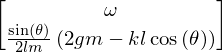

In [13]:
rhs = kane.rhs()
rhs.simplify()
rhs

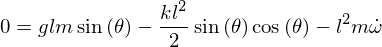

In [14]:
eq_print(0, (fr + frstar)[0])

In [15]:
from pydy.system import System
import numpy as np

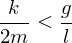

In [16]:
k / 2 / m  < g / l

In [17]:
p = {m: 1.0, k: 19.61, l: 1.0, g: 9.81}
x0 = {theta: pi / 10, omega: 0}
t = np.linspace(0, 10, num=10 * 60)

If $k$ is less than the following, the system will be unstable.

In [18]:
p[g] / p[l] * 2 * p[m]

In [19]:
p[k] / 2 / p[m] - p[g] / p[l]

In [20]:
sys = System(kane, constants=p, initial_conditions=x0, times=t)

In [21]:
x = sys.integrate()

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


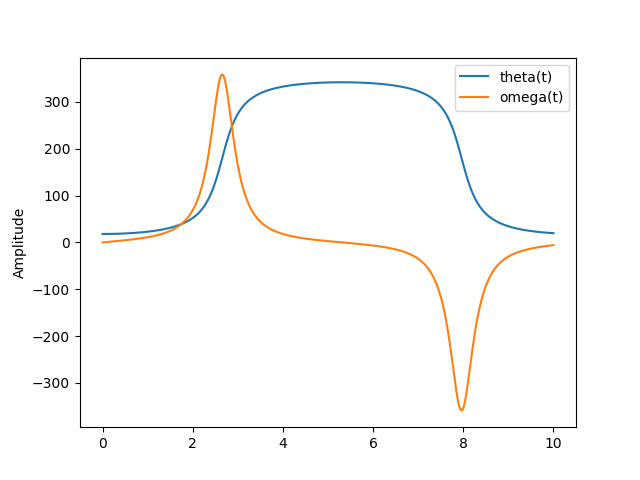

In [23]:
plt.plot(t, np.rad2deg(x))
plt.ylabel('Amplitude')
plt.legend([theta, omega])

In [24]:
from pydy.viz import VisualizationFrame, Scene, Cylinder, Sphere

In [25]:
sphere = Sphere(radius=l / 10, color='black')
cylinder = Cylinder(radius=l / 20, length=l)

In [26]:
bob_viz = VisualizationFrame(A, Pm, sphere)
arm_viz = VisualizationFrame(A, Ps, cylinder)

In [27]:
scene = Scene(N, O, bob_viz, arm_viz, system=sys)

In [28]:
scene.display_ipython()